## Noble Real Estates Housing Price Estimator
This project uses machine learning to predict the price of a house

In [1]:
#Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


## View of Raw Data Noble Real Estate Will Be Working With

In [2]:
#Creating Data frame to store housing data
housing_data = pd.read_csv("housing_prices/train.csv")
housing_data.head(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590,sqft,6000.00,sqft,98144,795000
1,4,2.0,2240,sqft,0.31,acre,98106,915000
2,4,3.0,2040,sqft,3783.00,sqft,98107,950000
3,4,3.0,3800,sqft,5175.00,sqft,98199,1950000
4,2,2.0,1042,sqft,NaN,NaN,98102,950000
5,2,2.0,1190,sqft,1.00,acre,98107,740000
6,1,1.0,670,sqft,6000.00,sqft,98133,460000
7,5,3.5,4510,sqft,6000.00,sqft,98105,3150000
8,3,2.5,1520,sqft,741.00,sqft,98108,565000
9,4,2.0,2340,sqft,9500.00,sqft,98178,699000


## Cleaning and Analyzing Data

In [3]:
#Looking to see how many of the houses in the data set are missing features
housing_data.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [4]:
#Filling missing values for lot size features with 0 and missing values for lot size features with sqft.
housing_data["lot_size"].fillna(0, inplace=True)
housing_data["lot_size_units"].fillna("sqft", inplace=True)

In [5]:
#Iterating through data frame to locate homes with lot sizes in acres and converting them to sqft.
for i in housing_data.index:
    if housing_data.iat[i,5] == "acre":
        housing_data.iat[i,4] = housing_data.iat[i,4] * 43560
        housing_data.iat[i,5] = "sqft"

In [6]:
#Determined the feature columns listing units of measurement were unnecessary given all features are now in the same unit of measurement
#renaming columns in data frame
housing_data.rename(columns={"size":"square_footage", "lot_size":"lot_size_in_sqft"}, inplace=True)
#And dropping columns
housing_data.drop(["size_units", "lot_size_units"], axis =1, inplace=True)

# View of Cleaned Data

In [7]:
#Viewing cleaned/processed data
housing_data.head(10)

,beds,baths,square_footage,lot_size_in_sqft,zip_code,price
0,3,2.5,2590,6000.0,98144,795000
1,4,2.0,2240,13503.6,98106,915000
2,4,3.0,2040,3783.0,98107,950000
3,4,3.0,3800,5175.0,98199,1950000
4,2,2.0,1042,0.0,98102,950000
5,2,2.0,1190,43560.0,98107,740000
6,1,1.0,670,6000.0,98133,460000
7,5,3.5,4510,6000.0,98105,3150000
8,3,2.5,1520,741.0,98108,565000
9,4,2.0,2340,9500.0,98178,699000


# Descriptive Methods

Scatter Plot Showing Square Footage VS Price

[Text(0.5, 1.0, 'Square Footage vs Price'),
 Text(0.5, 0, 'Square Footage'),
 Text(0, 0.5, 'Price')]

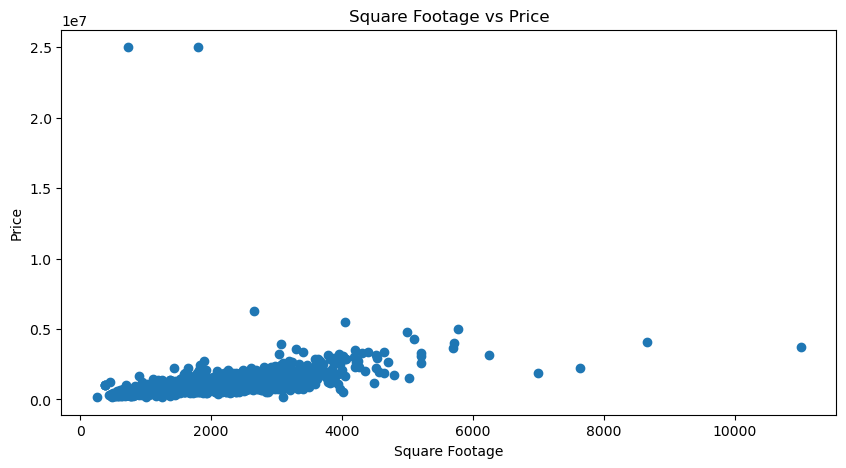

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
#plotting data
ax.scatter(housing_data["square_footage"].tolist(), housing_data["price"].tolist())
#Customizing plot
ax.set(title="Square Footage vs Price",
       xlabel="Square Footage",
       ylabel="Price")

Histograms Comparing Features in Housing Data

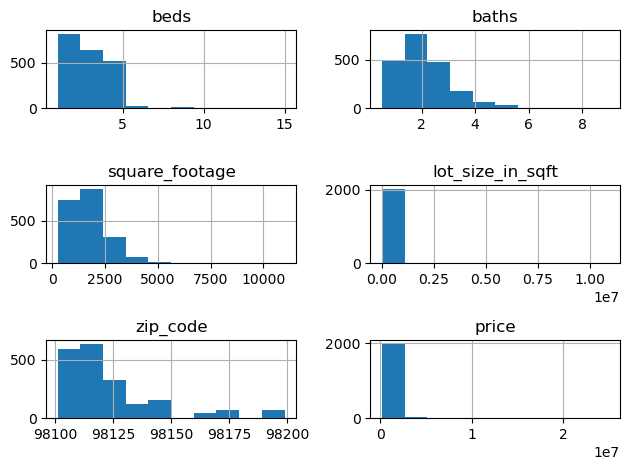

In [9]:
housing_data.hist()
plt.tight_layout()
plt.show()

Scatter Matrix Analyzing Housing Data

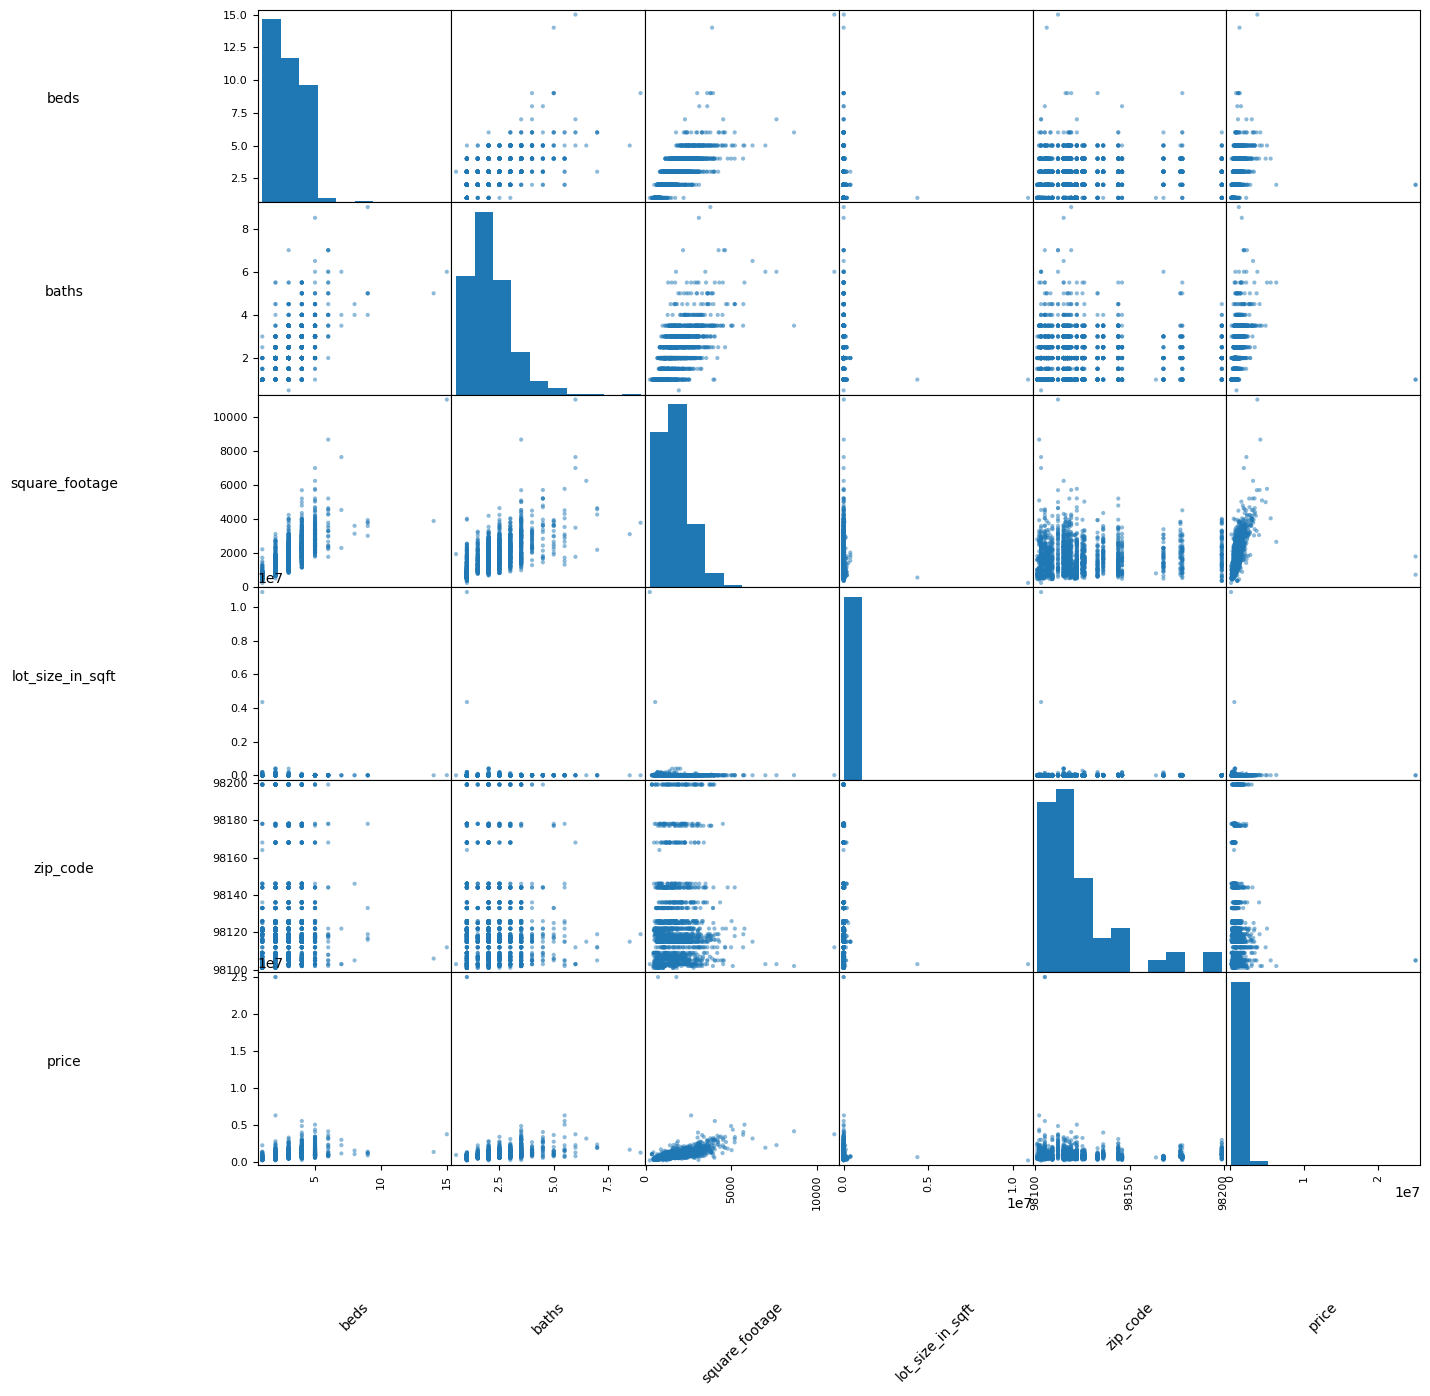

In [10]:
sm = scatter_matrix(housing_data, figsize=(15,15))

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May offsetting labels when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.0,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(0.5, -0.7) for s in sm.reshape(-1)]

plt.show()

## Building Machine Learning Model (non-descriptive method)

In [11]:
#Creating random seed
np.random.seed(42)

#Create feature matrix without price column
x = housing_data.drop("price", axis = 1)
#Create target matrix, dropping every column from housing_data except the price
y = housing_data["price"]
#Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Creating Linear Regression model
model = LinearRegression()
#training model
model.fit(x_train, y_train)

LinearRegression()

## Analyzing Accuracy of Machine Learning Model

Coefficient of Determination Score

In [12]:
#Scoring model using the coefficient of determination)
model.score(x_test, y_test)

0.5874501027488772

Mean Absolute Error Score

In [13]:
#Should be using MAE to determine accuracy because if you are trying to predict a home price you don't want to be too far off in either direction
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
print (mae)

220203.2901185928


Visual Data Frame and Graph Showing Predicted VS Actual Home Prices

In [14]:
#Creating visual dataframe for MAE
df1 = pd.DataFrame(data={"actual values": y_test,
                         "predicted values": y_preds})
df1["differences"]= df1["predicted values"] - df1["actual values"]
df1.head(10)

,actual values,predicted values,differences
1198,1060000,7.877625e+05,-272237.505339
526,949000,1.297391e+06,348391.391372
393,1360000,1.246525e+06,-113474.674560
1407,656500,6.175002e+05,-38999.807455
433,895000,9.549707e+05,59970.654016
1720,452100,6.043794e+05,152279.381111
1090,675000,6.945574e+05,19557.405641
429,1089000,1.620187e+06,531186.992788
1800,875000,6.686091e+05,-206390.859537
530,1000000,1.059451e+06,59450.648362


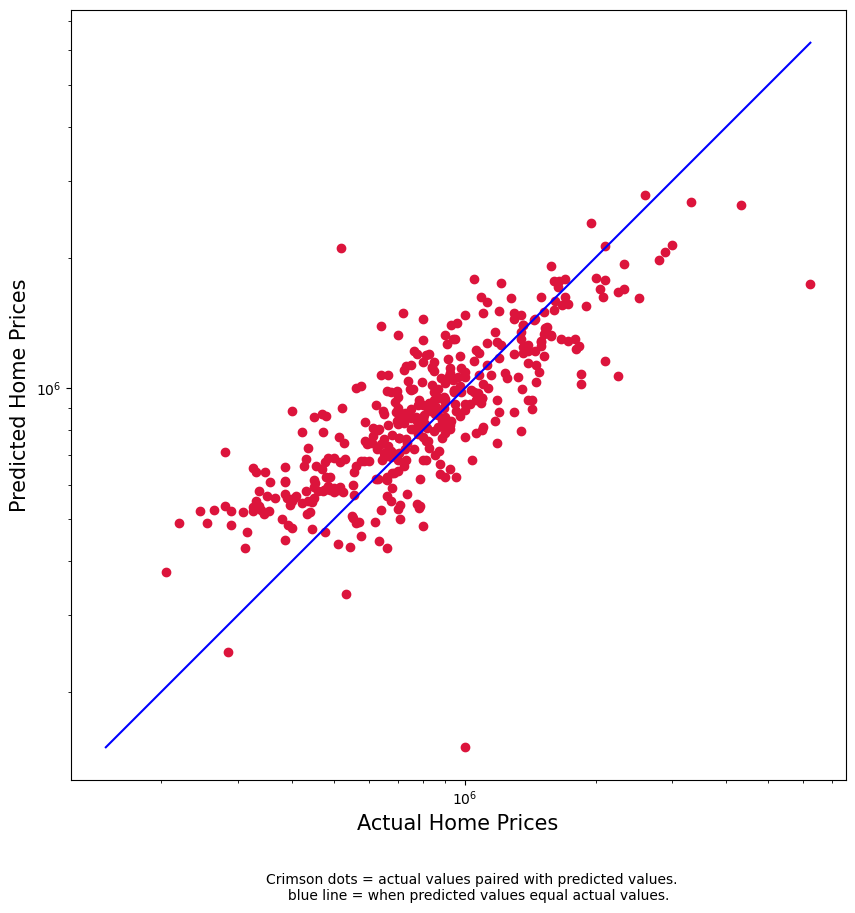

In [15]:
#Creating a plot that shows actual values paired with predicated values and trend line showing when predicted values where equal to actual values
plt.figure(figsize=(10,10))
plt.scatter(df1["actual values"], df1["predicted values"], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(df1["predicted values"]), max(df1["actual values"]))
p2 = min(min(df1["predicted values"]), min(df1["actual values"]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Home Prices', fontsize=15)
plt.ylabel('Predicted Home Prices', fontsize=15)
plt.axis('equal')
plt.figtext(0.32, -0.01, "Crimson dots = actual values paired with predicted values. \n \
    blue line = when predicted values equal actual values.")
plt.show()

## Enter the Features of a Home You Would Like to Know the Price Of

Features should be entered with a single space separating them and no commas (Ex. 4 3 2300 5000 98391)

In [16]:
#Getting user input
user_data = input("Enter the number of bedrooms, bathrooms, square footage, lot size, and zip code for a home you want to know the price of:")

#Splitting up that string of values into a list, is split at spaces
feature_list = list(user_data.split(" "))

#Placing list into data frame with columns names matching housing data, if I didn't include column names
#predic() function would give an error because the model was trained on data with column names.
temp_df = pd.DataFrame([feature_list], columns=["beds", "baths", "square_footage", "lot_size_in_sqft", "zip_code"])
temp_df.head()
x = model.predict(temp_df)
price = str(int(x[0]))
print("Based on the features for the home you entered, its estimated value is $" + price)

KeyboardInterrupt: Interrupted by user